<img src="https://github.com/MariaASerrano/Proyecto-IA1-UIS/blob/main/IDENTIFICACI%C3%93N%20DE%20ENFERMEDADES%20CARDIOVASCULARES%20RIESGOSAS.png?raw=true" width="100%">

# Identificación de enfermedades cardiovasculares riesgosas

***Integrantes:***
* 2172006 - Juan Camilo Londoño Jaimes
* 2171988 - Hernando José Rojas Castro
* 2171985 - María Angélica Serrano Mora

## **Introducción** 

Las enfermedades cardiovasculares son la causa número uno de muerte a nivel mundial, es decir, más personas mueren anualmente por enfermedades cardiovasculares que por cualquier otra causa. Se estima que 17,9 millones de personas murieron por enfermedades cardiovasculares en 2016, lo que representa el 31% de todas las muertes mundiales. De estas muertes, el 85% se deben a un ataque al corazón y a una apoplejía



## **Objetivo** 

* Identificar si una persona se encuentra en riesgo de sufrir una enfermedad cardiovascular. 

## **Motivación** 

Las enfermedades cardiovasculares (que incluyen la alta presión sanguínea, colesterol elevado y enfermedades del corazón) afectan el corazón al estrechar las arterias y reducir la cantidad de sangre que el corazón recibe, lo que hace que el corazón trabaje más duro. Estas muchas veces se presentan sin dolor y sin síntomas obvios. Por esa razón, a menudo no se tratan. Esto puede llevar a problemas de salud todavía más serios, como el ataque al corazón, la embolia y el daño a los riñones. Lo que es especialmente peligroso de las enfermedades cardiovasculares es que puedes padecer más de una a la vez sin siquiera saberlo.

La identificación de una enfermedad cardiovascular ayuda a los pacientes y doctores a tratar la enfermedad desde un inicio y no dejar que esta avance, perjudicando la vida del paciente.

<center><img src="https://i1.wp.com/hospitalgalenia.com/wp-content/uploads/2018/12/Enfermedades-cardiovasculares-1.jpg?resize=915%2C280&ssl=1" alt="Drawing" style="width:900px;"></center>

## **Datos**

Para la realización de este proyecto, el dataset utilizado fue de la plataforma kaggle, llamado [Cardiovascular Disease dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)



En este dataset se encuentran alrededor de 70.000 datos de pacientes, de diferentes edades y condiciones físicas, para así llegar a una conclusión más acertada teniendo en cuenta distintos factores.




## **Desarrollo** 

Se monta el drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
 %cd /content/drive/My Drive/Proyecto IA

/content/drive/My Drive/Proyecto IA


Se importan las librerías que se utilizarán

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import time

import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from tensorflow import keras

* Se carga el dataset
* Se eliminan datos irrelevantes
* Se cambia el formato de *age* a años

In [ ]:
d = pd.read_csv('cardio_train.csv', delimiter=';')
d = d.drop(['id', 'gender', 'smoke', 'alco'], axis=1)
d["age"] = d["age"]/365.25

* Se verifican los valores duplicados

In [ ]:
format(d.duplicated().sum())

'41'

* Se eliminan los valores duplicados

In [ ]:
d.drop_duplicates(inplace=True)

* Se hace un shape para verificar las filas con los valores eliminados y las columnas.
* Posteriomente, se hace un head para tener una idea de los datos que se van a manejar

In [ ]:
print(d.shape)
d.head()

(69959, 9)


age  height  weight  ap_hi  ap_lo  cholesterol  gluc  active  cardio
0  50.357290     168    62.0    110     80            1     1       1       0
1  55.381246     156    85.0    140     90            3     1       1       1
2  51.627652     165    64.0    130     70            3     1       0       1
3  48.249144     169    82.0    150    100            1     1       1       1
4  47.841205     156    56.0    100     60            1     1       0       0

* Se cuentan los datos de acuerdo a la columna *cardio* para verificar el balance de clases, donde el target 0 corresponde a los pacientes sanos y el 1 a los enfermos.

In [ ]:
d.cardio.value_counts()

0    34990
1    34969
Name: cardio, dtype: int64

* Se verifica que no hayan valores nulos.

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69959 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69959 non-null  float64
 1   height       69959 non-null  int64  
 2   weight       69959 non-null  float64
 3   ap_hi        69959 non-null  int64  
 4   ap_lo        69959 non-null  int64  
 5   cholesterol  69959 non-null  int64  
 6   gluc         69959 non-null  int64  
 7   active       69959 non-null  int64  
 8   cardio       69959 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 5.3 MB


**Matriz de correlación**

In [ ]:
corr = d.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

***Nota:***

El valor más alto fue de 0.451512, correspondiente a la correlación entre *gluc* y *cholesterol*. 

* Se prepara el dataset para proceder a entrenar los estimadores y la red neuronal.

In [ ]:
y = d['cardio']
X = d.drop(['cardio'], axis = 1)

In [ ]:
X.head()

age  height  weight  ap_hi  ap_lo  cholesterol  gluc  active
0  50.357290     168    62.0    110     80            1     1       1
1  55.381246     156    85.0    140     90            3     1       1
2  51.627652     165    64.0    130     70            3     1       0
3  48.249144     169    82.0    150    100            1     1       1
4  47.841205     156    56.0    100     60            1     1       0

* Se realiza la partición de los datos donde el 75% se utiliza para train y el restante para test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(52469, 8) (17490, 8) (52469,) (17490,)


* Se utiliza el comando *feature_importances_* para identificar las columnas más significativas

***Nota:***

Al ejecutar el comando *feature_importances_* se identificó que las columnas *'id', 'gender', 'smoke', 'alco'* no eran significativas, razón por la cual se eliminaron al iniciar el preprocesamiento de los datos.

In [ ]:
est = DecisionTreeClassifier(max_depth=6)
est.fit(X_train,y_train)
est.feature_importances_

array([0.12379933, 0.00561822, 0.00969482, 0.76614687, 0.00676811,
       0.07765106, 0.00634978, 0.0039718 ])

* Se utilizará Standard Scaler para comparar si influye en la precisión entre los normalizados y no normalizados. 

**Preprocessing: Standard Scaler**

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### **Algoritmos supervisados sin Standard Scaler** 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape= [X_train.shape[1]]),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(128, activation='relu'),                          
    tf.keras.layers.Dense(1, activation='sigmoid')           
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
test_loss, score_DNN = model.evaluate(X_test, y_test)
print("Precisión: "+str(score_DNN))

Epoch 1/10
1640/1640 [==============================] - 4s 2ms/step - loss: 0.9073 - accuracy: 0.6476
Epoch 2/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.6369 - accuracy: 0.6903
Epoch 3/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.6148 - accuracy: 0.6928
Epoch 4/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.5980 - accuracy: 0.7050
Epoch 5/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.5854 - accuracy: 0.6998
Epoch 6/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.5811 - accuracy: 0.7030
Epoch 7/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.5807 - accuracy: 0.7007
Epoch 8/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.5742 - accuracy: 0.7084
Epoch 9/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.5780 - accuracy: 0.7074
Epoch 10/10
547/547 [==============================] - 1s 1ms/step - loss: 0.5658 

In [ ]:
names = ["Gaussian Naive", "Decision Tree", "Random Forest", "Rbf SVC"]

classifiers = [
    GaussianNB(),
    DecisionTreeClassifier(max_depth=6),
    RandomForestClassifier(n_estimators=200, max_depth=10),
    SVC(kernel="rbf"),]

scores = []
scores.append(score_DNN)

for name, est in zip(names, classifiers):
  start = time.time()
  est.fit(X_train,y_train)
  end=time.time()
  timet=end-start
  score=est.score(X_test,y_test)
  scores.append(score)
  print(name)
  print("Precisión: "+str(score))
  print("Tiempo de Ejecución: "+str(timet)+" segundos")


Gaussian Naive
Precisión: 0.5897655803316181
Tiempo de Ejecución: 0.017264842987060547 segundos
Decision Tree
Precisión: 0.7316180674671241
Tiempo de Ejecución: 0.07482743263244629 segundos
Random Forest
Precisión: 0.7363636363636363
Tiempo de Ejecución: 5.308691024780273 segundos
Rbf SVC
Precisión: 0.7258433390508863
Tiempo de Ejecución: 89.3027732372284 segundos


### **Algoritmos supervisados con Standard Scaler** 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape= [X_train_std.shape[1]]),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(128, activation='relu'),                          
    tf.keras.layers.Dense(1, activation='sigmoid')           
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_std, y_train, epochs=10)
test_loss, score_DNNSC = model.evaluate(X_test_std, y_test)
print("Precisión: "+str(score_DNNSC))

Epoch 1/10
1640/1640 [==============================] - 4s 2ms/step - loss: 0.5995 - accuracy: 0.6940
Epoch 2/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.5511 - accuracy: 0.7293
Epoch 3/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.5445 - accuracy: 0.7347
Epoch 4/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.5493 - accuracy: 0.7289
Epoch 5/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.5454 - accuracy: 0.7339
Epoch 6/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.5423 - accuracy: 0.7347
Epoch 7/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.5423 - accuracy: 0.7358
Epoch 8/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.5422 - accuracy: 0.7354
Epoch 9/10
1640/1640 [==============================] - 3s 2ms/step - loss: 0.5399 - accuracy: 0.7364
Epoch 10/10
547/547 [==============================] - 1s 1ms/step - loss: 0.5420 

In [ ]:
names = ["Gaussian Naive", "Decision Tree", "Random Forest", "Rbf SVC"]

classifiers = [
    GaussianNB(),
    DecisionTreeClassifier(max_depth=6),
    RandomForestClassifier(n_estimators=200, max_depth=10),
    SVC(kernel="rbf"),]

scoresSC = []
scoresSC.append(score_DNNSC)

for name, est in zip(names, classifiers):
  start = time.time()
  est.fit(X_train_std,y_train)
  end=time.time()
  timet=end-start
  score=est.score(X_test_std,y_test)
  scoresSC.append(score)
  print(name)
  print("Precisión: "+str(score))
  print("Tiempo de Ejecución: "+str(timet)+" segundos")

Gaussian Naive
Precisión: 0.5897655803316181
Tiempo de Ejecución: 0.013974666595458984 segundos
Decision Tree
Precisión: 0.7315608919382505
Tiempo de Ejecución: 0.07576990127563477 segundos
Random Forest
Precisión: 0.7353344768439108
Tiempo de Ejecución: 5.26701021194458 segundos
Rbf SVC
Precisión: 0.7306460834762721
Tiempo de Ejecución: 91.19481158256531 segundos


### **Comparación de resultados** 

Sin SC


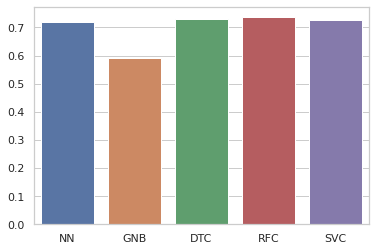

In [ ]:
names = ["NN","GNB", "DTC", "RFC", "SVC"]
sns.set_theme(style="whitegrid")
print("Sin SC")
ax = sns.barplot(x=names, y=scores)

Con SC


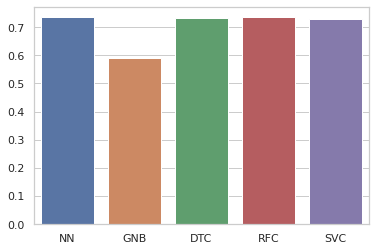

In [ ]:
print("Con SC")
ax = sns.barplot(x=names, y=scoresSC)

* A continuación, se muestra una tabla donde se pueden ver la comparación de las precisiones:

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Clasificador', 'Scores sin Standard Scaler', 'Scores con Standard Scaler']),
                 cells=dict(values=[names, scores, scoresSC]))
                     ])
fig.show()

### **Algoritmos no supervisados** 

* Se realiza el mismo preprocesamiento anteriormente.

In [ ]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

* Se hace el entrenamiento del algoritmo con los datos respectivos y se evalúan con los datos de test usados previamente

In [ ]:
est=KMeans(n_clusters=2) 
start = time.time()
est.fit(X_std)
end=time.time()
timet=end-start
print("KMeans")
print("Tiempo de Ejecución: "+str(timet)+" segundos")
y_predict=est.predict(X_test)
print("Precisión: "+str(np.mean (y_predict == y_test)))

KMeans
Tiempo de Ejecución: 0.5933437347412109 segundos
Precisión: 0.505431675242996
